# Image and Multiple Bounding Boxes Augmentation for Deep Learning



In [ ]:
# we will import all required libraries for this tutorial in advance

import imgaug as ia
ia.seed(1)
import random
# imgaug uses matplotlib backend for displaying images
import matplotlib.pyplot as plt
%matplotlib inline
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa 
# imageio library will be used for image input/output
import imageio
import pandas as pd
import numpy as np
import re
import os
import glob
# this library is needed to read XML files for converting it into CSV
import xml.etree.ElementTree as ET
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Store the dataset that contain images and their corresponding xml files**

In [ ]:
path = '/content/drive/MyDrive/Last_dataset/'

**2. Information about the images and their corresponding xml file**


In [ ]:
# load images as NumPy arrays and append them to images list
images = []
for index, file in enumerate(glob.glob(path+'/*.jpg')):
    images.append(imageio.imread(file))
    
# how many images we have
print('We have {} images'.format(len(images)))

We have 32 images


In [ ]:
# what are the sizes of the images
for index, file in enumerate(glob.glob(path+'/*.jpg')):
    print('Image {} have size of {}'.format(file[36:], images[index].shape))

As you can see we have images of different sizes. Tuple of 3 numbers correspond to (width, height, channels). All our images are color images and consist of 3 channels RGB: red, green and blue.

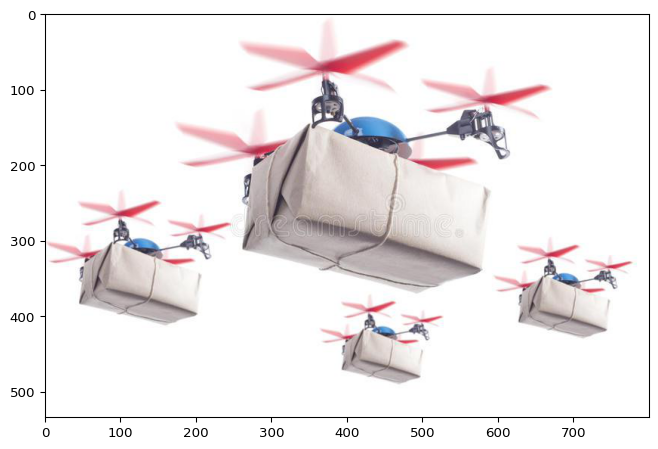

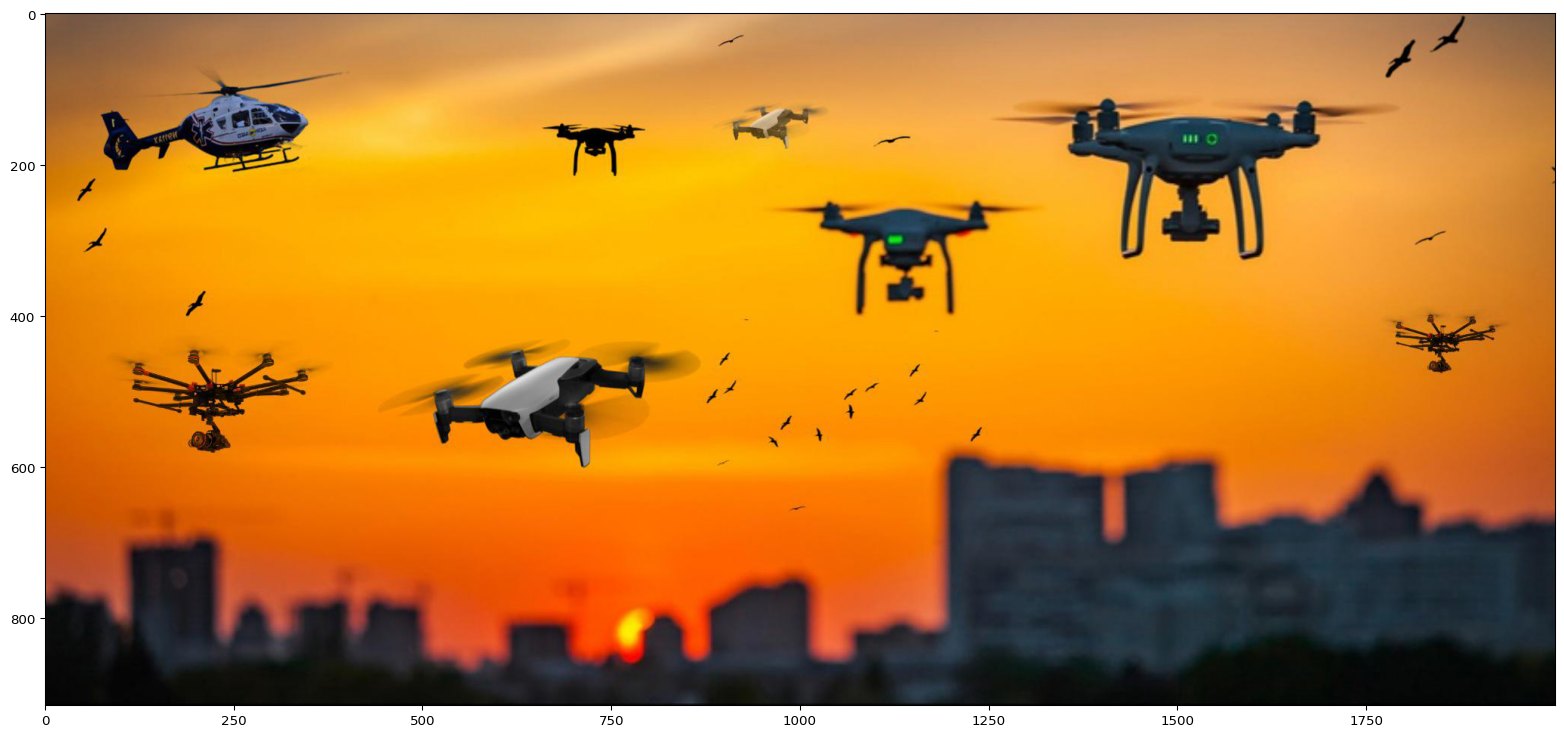

In [ ]:
# Have a loook at 2 images
ia.imshow(images[1])
ia.imshow(images[15])



Now let's have a look at one of the XML files.

In [ ]:
# XML file names correspond to the image file names
for index, file in enumerate(glob.glob(path+'/*.xml')):
    print(file[36:])

1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8bb2a13163f10cbb4e22b2c.xml
004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.xml
008_jpg.rf.94fc6a3a9a884bc5670da322c220878d.xml
009_jpeg.rf.479de2025ff47b5f9fb5e407ff10e104.xml
012_jpg.rf.78f1124bd62708bdbd586a321180af7a.xml
013_jpg.rf.5633198020320cfe8d59ccff329589de.xml
020_jpg.rf.1dd2b9a7ac858818b13bb96a2cdd2b8b.xml
delivery-drone-swarm-drones-delivering-packages-same-day-more-customer-satisfaction-concept-44372990_jpg.rf.c96c398bc3f80c25b4847bd2824580a3.xml
diana-macesanu-3ciHxbx9H0U-unsplash_jpg.rf.3534f454a345d2621f7e72b7b2d5bc56.xml
dozens-drones-swarm-clear-sky-dozens-drones-swarm-clear-blue-sky-140048047_jpg.rf.ee752218a5675b387d6f79492759940b.xml
dozens-drones-swarm-cloudy-sky-dozens-drones-swarm-ominous-sky-99257922_jpg.rf.f17db541c790a584b134241f264b625f.xml
drone-airport-no-fly-zone-danger-concept-blue-sky-145731186_jpg.rf.4b9ea573c1714064e694c816055dd21c.xml
drone-swarm--1-_jpg.rf.fec446b62674d597b896fda950d2ae18.xml
drone-wind-photo-

In [ ]:
# have a look how one of the XML annotation file looks like
# notice how it has 2 bounding boxes with Drones
shutil.copy('/content/drive/MyDrive/Last_dataset/004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.xml',
            '/content/drive/MyDrive/Last_dataset/004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.txt')
annotation_text = open("/content/drive/MyDrive/Last_dataset/004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.txt", "r")
print(annotation_text.read())
annotation_text.close() 

<annotation>
	<folder>Last_dataset</folder>
	<filename>004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.jpg</filename>
	<path>/Users/abhisheknegi/Desktop/labelImg/Last_dataset/004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>800</width>
		<height>600</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>Drone</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>102</xmin>
			<ymin>171</ymin>
			<xmax>515</xmax>
			<ymax>496</ymax>
		</bndbox>
	</object>
</annotation>



**3. Convert all the xml files into a csv file**

In [ ]:
# Function that will extract column data for our CSV file as pandas DataFrame
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            try:
                value = (root.find('filename').text,
                         int(root.find('size')[0].text),
                         int(root.find('size')[1].text),
                         member[0].text,
                         int(member[4][0].text),
                         int(member[4][1].text),
                         int(member[4][2].text),
                         int(member[4][3].text)
                         )
                xml_list.append(value)
            except:
                pass
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
# apply xml_to_csv() function to convert all XML files in images/ folder into labels.csv
labels_df = xml_to_csv(path)
labels_df.to_csv(('labels.csv'), index=None)
print('Successfully converted xml to csv.')

Successfully converted xml to csv.


In [ ]:
# in previuos cell we also put all annotation in labels_df
# let's see what's inside
# each bounding box has a separate row
labels_df

filename  width  ...  xmax ymax
0    1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8bb2...    987  ...   415  282
1    1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8bb2...    987  ...   969  475
2      004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.jpg    800  ...   515  496
3      008_jpg.rf.94fc6a3a9a884bc5670da322c220878d.jpg   1021  ...   244  203
4      008_jpg.rf.94fc6a3a9a884bc5670da322c220878d.jpg   1021  ...   674  446
..                                                 ...    ...  ...   ...  ...
291  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...    800  ...   793   49
292  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...    800  ...   747  314
293  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...    800  ...   768  282
294  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...    800  ...   412  376
295  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...    800  ...   615  376

[296 rows x 8 columns]

**4. Resize all images together with the corresponding object bounding boxes**



In [ ]:
## THESE MAY NEED TO BE CHANGED AS EACH TIME WE READ FROM DRIVE THE INDEX CHANGES

example_image = "004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.jpg"
example_index = 4
example_path = "/content/drive/MyDrive/Last_dataset/"+example_image

In [ ]:
# start by groupping each image bounding boxes coordinates
# separate dataframes are formed based on the filename
grouped = labels_df.groupby('filename')

In [ ]:
# we can pull each group with get_group() using the filename
group_df = grouped.get_group(example_image)
group_df = group_df.reset_index()
group_df = group_df.drop(['index'], axis=1)
group_df

filename  width  ...  xmax ymax
0  004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.jpg    800  ...   515  496

[1 rows x 8 columns]

**5. Visualization of bounding boxes before resizing**

In [ ]:
# get bounding boxes coordinates from grouped data frame and write into array        
bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
# display the array we've got
bb_array

array([[102, 171, 515, 496]])

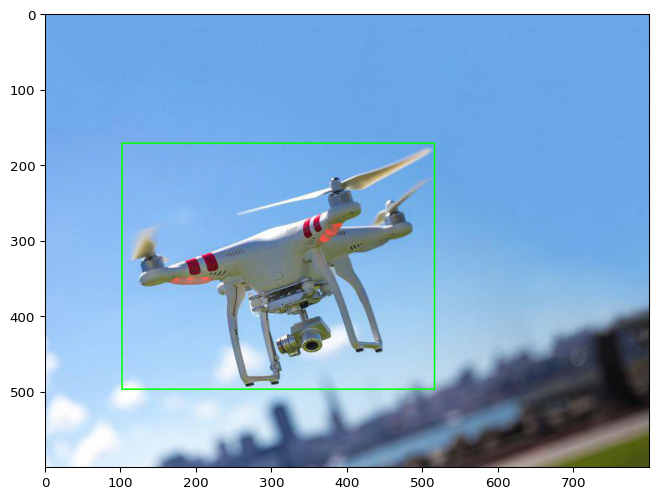

In [ ]:
# pass the array of bounding boxes coordinates to the imgaug library
bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=images[example_index].shape)
# display the image and draw bounding boxes
ia.imshow(bbs.draw_on_image(images[example_index], size=2))

In [ ]:
# to resize the images we create two augmenters
# one is used when the image height is more than 600px and the other when the width is more than 600px
height_resize = iaa.Sequential([ 
    iaa.Resize({"height": 720, "width": 'keep-aspect-ratio'})
])

width_resize = iaa.Sequential([ 
    iaa.Resize({"height": 'keep-aspect-ratio', "width": 720})
])

When we augment images using imgaug library it resizes the bounding boxes as well and return BoundingBoxesOnImage object.
It looks like this: 
```
['filename.jpg',
 BoundingBoxesOnImage([BoundingBox(x1=81.1250, y1=114.5000, x2=324.8750, y2=320.7500, label=None)], shape=(337, 600, 3))]
```
bbs_obj_to_df() function will convert BoundingBoxesOnImage object to data frame with xmin, ymin, xmax, ymax columns.

In [ ]:
# function to convert BoundingBoxesOnImage object into DataFrame
def bbs_obj_to_df(bbs_object):
#     convert BoundingBoxesOnImage object into array
    bbs_array = bbs_object.to_xyxy_array()
#     convert array into a DataFrame ['xmin', 'ymin', 'xmax', 'ymax'] columns
    df_bbs = pd.DataFrame(bbs_array, columns=['xmin', 'ymin', 'xmax', 'ymax'])
    return df_bbs

Next, define resize_imgaug() function. 

It will take pandas DataFrame with ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'] columns. 

And apply resizing augmentation to the image and all corresponding bounding boxes. 

The function will return DataFrame with updated images and bounding boxes annotations.
resize_imgaug() function takes the following variables:
- df: pandas DataFrame with ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'] columns, labels_df in our case
- images_path: path to the folder with original images, 'images/' in our case(don't forget the forward slash)
- aug_images_path: path to the folder where augmented images will be stored, e.g. 'aug_images/' (the folder should be created in advance)
- image_prefix:  prefix for augmented image filenames, e.g 'aug_'

In [ ]:
def resize_imgaug(df, images_path, aug_images_path, image_prefix):
    # create data frame which we're going to populate with augmented image info
    aug_bbs_xy = pd.DataFrame(columns=
                              ['filename','width','height','class', 'xmin', 'ymin', 'xmax', 'ymax']
                             )
    grouped = df.groupby('filename')    
    
    for filename in df['filename'].unique():
    #   Get separate data frame grouped by file name
        group_df = grouped.get_group(filename)
        group_df = group_df.reset_index()
        group_df = group_df.drop(['index'], axis=1)
        
    #   The only difference between if and elif statements below is the use of height_resize and width_resize augmentors
    #   deffined previously.

    #   If image height is greater than or equal to image width 
    #   AND greater than 600px perform resizing augmentation shrinking image height to 600px.
        if group_df['height'].unique()[0] >= group_df['width'].unique()[0] and group_df['height'].unique()[0] > 600:
        #   read the image
            image = imageio.imread(images_path+filename)
        #   get bounding boxes coordinates and write into array        
            bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
        #   pass the array of bounding boxes coordinates to the imgaug library
            bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
        #   apply augmentation on image and on the bounding boxes
            image_aug, bbs_aug = height_resize(image=image, bounding_boxes=bbs)
        #   write augmented image to a file
            imageio.imwrite(aug_images_path+image_prefix+filename, image_aug)  
        #   create a data frame with augmented values of image width and height
            info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)        
            for index, _ in info_df.iterrows():
                info_df.at[index, 'width'] = image_aug.shape[1]
                info_df.at[index, 'height'] = image_aug.shape[0]
        #   rename filenames by adding the predifined prefix
            info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix+x)
        #   create a data frame with augmented bounding boxes coordinates using the function we created earlier
            bbs_df = bbs_obj_to_df(bbs_aug)
        #   concat all new augmented info into new data frame
            aug_df = pd.concat([info_df, bbs_df], axis=1)
        #   append rows to aug_bbs_xy data frame
            aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])
            
    #   if image width is greater than image height 
    #   AND greater than 600px perform resizing augmentation shrinking image width to 600px
        elif group_df['width'].unique()[0] > group_df['height'].unique()[0] and group_df['width'].unique()[0] > 600:
        #   read the image
            image = imageio.imread(images_path+filename)
        #   get bounding boxes coordinates and write into array        
            bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
        #   pass the array of bounding boxes coordinates to the imgaug library
            bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
        #   apply augmentation on image and on the bounding boxes
            image_aug, bbs_aug = width_resize(image=image, bounding_boxes=bbs)
        #   write augmented image to a file
            imageio.imwrite(aug_images_path+image_prefix+filename, image_aug)  
        #   create a data frame with augmented values of image width and height
            info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)        
            for index, _ in info_df.iterrows():
                info_df.at[index, 'width'] = image_aug.shape[1]
                info_df.at[index, 'height'] = image_aug.shape[0]
        #   rename filenames by adding the predifined prefix
            info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix+x)
        #   create a data frame with augmented bounding boxes coordinates using the function we created earlier
            bbs_df = bbs_obj_to_df(bbs_aug)
        #   concat all new augmented info into new data frame
            aug_df = pd.concat([info_df, bbs_df], axis=1)
        #   append rows to aug_bbs_xy data frame
            aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])

    #     append image info without any changes if it's height and width are both less than 600px 
        else:
            aug_bbs_xy = pd.concat([aug_bbs_xy, group_df])
    # return dataframe with updated images and bounding boxes annotations 
    aug_bbs_xy = aug_bbs_xy.reset_index()
    aug_bbs_xy = aug_bbs_xy.drop(['index'], axis=1)
    return aug_bbs_xy

In [ ]:
# apply resizing augmentation to our images and write the updated images and bounding boxes annotations to the DataFrame 
# we will not apply prefix to our files and will overwrite images in the same directory

resized_images_df = resize_imgaug(labels_df, path, path, '')

In [ ]:
# display new DataFrame
resized_images_df

filename  ...        ymax
0    1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8bb2...  ...  205.880432
1    1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8bb2...  ...  346.784424
2      004_jpg.rf.893cbe6d19ad15ba6cf7c954524006ab.jpg  ...  446.399994
3      008_jpg.rf.94fc6a3a9a884bc5670da322c220878d.jpg  ...  143.149994
4      008_jpg.rf.94fc6a3a9a884bc5670da322c220878d.jpg  ...  314.506897
..                                                 ...  ...         ...
291  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...  ...   44.047871
292  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...  ...  282.265961
293  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...  ...  253.500000
294  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...  ...  338.000000
295  whowillcontr_png.rf.2486b4a8efed31ccdcbf310a6c...  ...  338.000000

[296 rows x 8 columns]

In [ ]:
# overwrite the labels.csv with updated info
resized_images_df.to_csv('labels.csv', index=False)

**6.Visualizing the image after resizing**

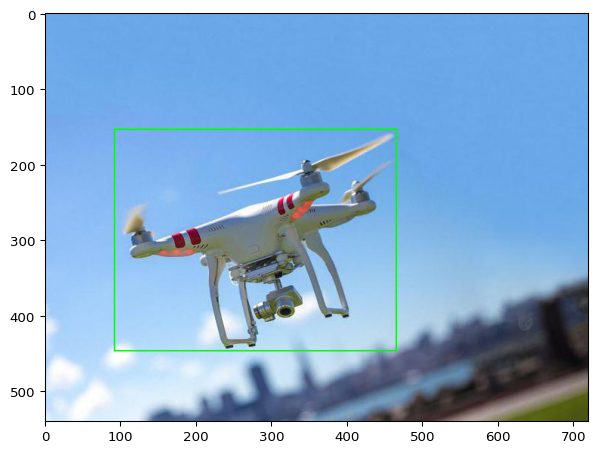

In [ ]:
# visualise the resized Example  image with bounding boxes
# to make sure our bounding boxes were resized correctly as well


grouped = resized_images_df.groupby('filename')
group_df = grouped.get_group(example_image)
group_df = group_df.reset_index()
group_df = group_df.drop(['index'], axis=1)
bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
image = imageio.imread(example_path)
bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)
ia.imshow(bbs.draw_on_image(image, size=2))

**7. Perform Augmentation on the given Image (For each image perform 8 type of augmentation)**

In [ ]:
def image_aug(df, images_path, aug_images_path, image_prefix, augmentor):
    # create data frame which we're going to populate with augmented image info
    num_augmentations = len(augmentor)
    aug_bbs_xy = pd.DataFrame(columns=
                              ['filename','width','height','class', 'xmin', 'ymin', 'xmax', 'ymax']
                             )
    grouped = df.groupby('filename')
    
    for filename in df['filename'].unique():
    #   get separate data frame grouped by file name
        group_df = grouped.get_group(filename)
        group_df = group_df.reset_index()
        group_df = group_df.drop(['index'], axis=1)   
    #   read the image
        image = imageio.imread(images_path+filename)
    #   get bounding boxes coordinates and write into array        
        bb_array = group_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
    #   pass the array of bounding boxes coordinates to the imgaug library
        bbs = BoundingBoxesOnImage.from_xyxy_array(bb_array, shape=image.shape)


    #   apply each of the 8 augmentation 1 by one on the given image..
        for i in range(num_augmentations):


        #   apply augmentation on image and on the bounding boxes
          image_aug, bbs_aug = augmentor[i](image=image, bounding_boxes=bbs)


        #   disregard bounding boxes which have fallen out of image pane    
          bbs_aug = bbs_aug.remove_out_of_image()
        #   clip bounding boxes which are partially outside of image pane
          bbs_aug = bbs_aug.clip_out_of_image()
        
        #   don't perform any actions with the image if there are no bounding boxes left in it    
          if re.findall('Image...', str(bbs_aug)) == ['Image([]']:
              pass
        
        #   otherwise continue
          else:
            #   write augmented image to a file
              imageio.imwrite(aug_images_path+image_prefix[i]+filename, image_aug)  
            #   create a data frame with augmented values of image width and height
              info_df = group_df.drop(['xmin', 'ymin', 'xmax', 'ymax'], axis=1)    
              for index, _ in info_df.iterrows():
                  info_df.at[index, 'width'] = image_aug.shape[1]
                  info_df.at[index, 'height'] = image_aug.shape[0]
            #   rename filenames by adding the predifined prefix
              info_df['filename'] = info_df['filename'].apply(lambda x: image_prefix[i]+x)
            #   create a data frame with augmented bounding boxes coordinates using the function we created earlier
              bbs_df = bbs_obj_to_df(bbs_aug)
            #   concat all new augmented info into new data frame
              aug_df = pd.concat([info_df, bbs_df], axis=1)
            #   append rows to aug_bbs_xy data frame
              aug_bbs_xy = pd.concat([aug_bbs_xy, aug_df])            
    
    # return dataframe with updated images and bounding boxes annotations 
    aug_bbs_xy = aug_bbs_xy.reset_index()
    aug_bbs_xy = aug_bbs_xy.drop(['index'], axis=1)
    return aug_bbs_xy

**Augmentation Pipeline(We can change it later)**

In [ ]:
# we will define 8 augmenters for each image so that we can generate 32*8 = 256 augmented images in total...

# horizontally flip  all images
hzntal_flip_aug = iaa.Sequential([ iaa.Fliplr(1.0),
        iaa.Sometimes(
        0.2,
        iaa.LinearContrast((0.75, 1.5))),
        iaa.Sometimes(
        0.1,
        iaa.Grayscale(alpha=(0.0, 1.0)))
    ])

# crop some of the images by 0-10% of their height/width
crop_aug = iaa.Sequential([iaa.Crop(percent=(0, 0.1))
    ])

# - scale to 80-120% of image height/width (each axis independently)
scale_aug = iaa.Sequential([ iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}),
     iaa.Sometimes(
        0.2,
        iaa.LinearContrast((0.75, 1.5))),
        iaa.Sometimes(
        0.1,
        iaa.Grayscale(alpha=(0.0, 1.0)))
    ])

 # - translate by -20 to +20 relative to height/width (per axis)
translate_aug = iaa.Sequential([iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
    ])

# - rotate by -45 to +45 degrees
rotate_aug = iaa.Sequential([ iaa.Affine(rotate=(-25, 25)),
        iaa.Sometimes(
        0.2,
        iaa.LinearContrast((0.75, 1.5))),
        iaa.Sometimes(
        0.1,
        iaa.Grayscale(alpha=(0.0, 1.0)))
    ])

 # - shear by -16 to +16 degrees
shear_aug = iaa.Sequential([iaa.Affine(shear=(-10, 10))
    ])

# Change brightness of images (50-150% of original value).
brightness_aug = iaa.Sequential([ iaa.Multiply((0.5, 1.5), per_channel=0.5)
    ])

#do the blurring..
blur_aug = iaa.Sequential([iaa.GaussianBlur((0, 1.0))
    ])

#Stack all augmentors in a pipeline...
Augmentors = [hzntal_flip_aug,
              crop_aug,
              scale_aug,
              translate_aug,
              rotate_aug,
              shear_aug,
              brightness_aug,
              blur_aug]

image_prefixes = ['hf_','cr_','sc_','tr_','ro_','sh_','br_','bl_']


In [ ]:
# Apply augmentation to our images and save files into 'aug_images/' folder with  prefix.
# Write the updated images and bounding boxes annotations to the augmented_images_df dataframe.
path_to_aug_folder = '/content/drive/MyDrive/Augmented_images/'
augmented_images_df = image_aug(resized_images_df, path, path_to_aug_folder, image_prefixes, Augmentors)

**8. Store the information of bounding boxes after augmentation in a dataframe**

In [ ]:
# display new dataframe
augmented_images_df

filename  ...        ymax
0     hf_1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8...  ...  205.880432
1     hf_1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8...  ...  346.784424
2     cr_1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8...  ...  201.359100
3     cr_1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8...  ...  367.395081
4     sc_1_ENo9TMRTrU6KCfmnAahmGw_jpeg.rf.dd2db5e8e8...  ...  205.538757
...                                                 ...  ...         ...
2363  bl_whowillcontr_png.rf.2486b4a8efed31ccdcbf310...  ...   44.047871
2364  bl_whowillcontr_png.rf.2486b4a8efed31ccdcbf310...  ...  282.265961
2365  bl_whowillcontr_png.rf.2486b4a8efed31ccdcbf310...  ...  253.500000
2366  bl_whowillcontr_png.rf.2486b4a8efed31ccdcbf310...  ...  338.000000
2367  bl_whowillcontr_png.rf.2486b4a8efed31ccdcbf310...  ...  338.000000

[2368 rows x 8 columns]

**9.Looking at images before and after augmentations**

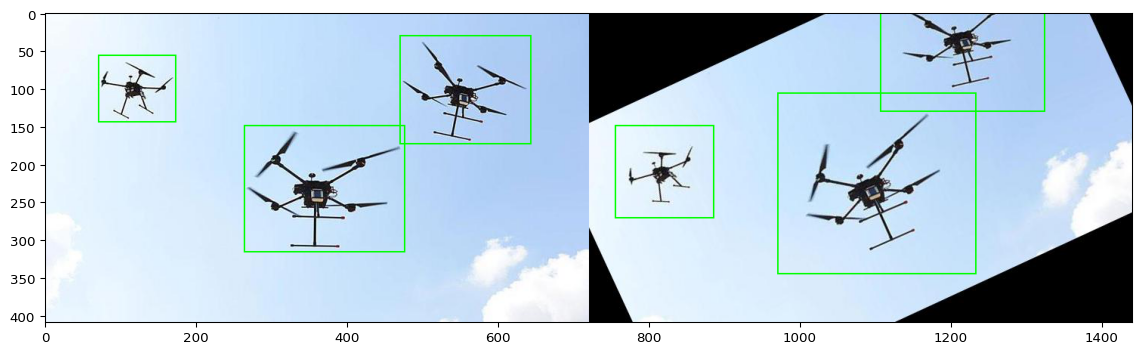

In [ ]:
grouped_resized = resized_images_df.groupby('filename')
grouped_augmented = augmented_images_df.groupby('filename')

filename = resized_images_df['filename'].unique()[2]

group_r_df = grouped_resized.get_group(filename)
group_r_df = group_r_df.reset_index()
group_r_df = group_r_df.drop(['index'], axis=1)
bb_r_array = group_r_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
resized_img = imageio.imread(path+filename)
bbs_r = BoundingBoxesOnImage.from_xyxy_array(bb_r_array, shape=resized_img.shape)

#to get the augmented file replace the prefix with 'ro_' if we want to see the rotated images
group_a_df = grouped_augmented.get_group('ro_'+filename)
group_a_df = group_a_df.reset_index()
group_a_df = group_a_df.drop(['index'], axis=1)
bb_a_array = group_a_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
augmented_img = imageio.imread(path_to_aug_folder+'ro_'+filename)
bbs_a = BoundingBoxesOnImage.from_xyxy_array(bb_a_array, shape=augmented_img.shape)

ia.imshow(np.hstack([
            bbs_r.draw_on_image(resized_img, size=2),
            bbs_a.draw_on_image(augmented_img, size=2)
            ]))

**10. Store the old bbox info+augmented bbox info to a new file**

In [ ]:
# Concat resized_images_df and augmented_images_df together and save in a new all_labels.csv file
all_labels_df = pd.concat([resized_images_df, augmented_images_df])
all_labels_df.to_csv('dataset_final_1.csv', index=False)

In [ ]:
# Lastly we can copy all our augmented images in the same folder as original resized images
for file in os.listdir('/content/drive/MyDrive/Augmented_images'):
    shutil.copy(path_to_aug_folder+file, path+file)

**11. Convert the final csv to yolo format and store all annotations in a YF1 folder** 

#### Create a YF1 folder in advance which will be used to store the .txt files for yolo

In [ ]:
grouped1 = all_labels_df.groupby('filename')

In [ ]:
Classes = {'Drone':0}
uniq_files = all_labels_df['filename'].unique()
for filename in uniq_files:
  group_df = grouped1.get_group(filename)

  #This will contain the information about the bounding boxes in yolo format 
  infos = []
  #get the prefix of jpg file
  pos = filename.rfind('.')
  prefix = filename[:pos]+'.txt'
  #get the number of bounding boxes present in that image..
  num_bbox = group_df.shape[0]

  #for each bbox get the normalized cordinates..
  for i in range(num_bbox):
    
    #If the bounding box is not present (have some cordinates as missing we ignore it)..

    if group_df.iloc[i].isnull().any() == False:
      #Get the numeric class of the object present in the bounding box..
      lbl = Classes[group_df.iloc[i]['class']]

      #get width and height
      W = group_df.iloc[i]['width']
      H = group_df.iloc[i]['height']

      #normalized center cordinates for BBoxes..
      xcen = float((group_df.iloc[i]['xmin'] + group_df.iloc[i]['xmax'])) / 2 / W
      ycen = float((group_df.iloc[i]['ymin'] + group_df.iloc[i]['ymax'])) / 2 / H

      #normalized width and height of bboxes..
      w = float((group_df.iloc[i]['xmax'] - group_df.iloc[i]['xmin'])) / W
      h = float((group_df.iloc[i]['ymax'] - group_df.iloc[i]['ymin'])) / H

      #combine all the above information into a string and add it to the list
      temp = str(lbl)+" "+str(xcen)+" "+str(ycen)+" "+str(w)+" "+str(h)

      #If it is the last bbox do not append new line..
      if i == num_bbox-1:
        infos.append(temp)
      else:
        infos.append(temp+'\n')
      

  #Append all the bbox information for the given file into a .txt file..
  with open('YF1/'+prefix ,'w') as file:
    for i in range(len(infos)):
      file.write(infos[i])


In [ ]:
#Convert the Folder to zip and download...
!zip -r YF1.zip YF1

**12 Visulaizing augmentations of a sample image**

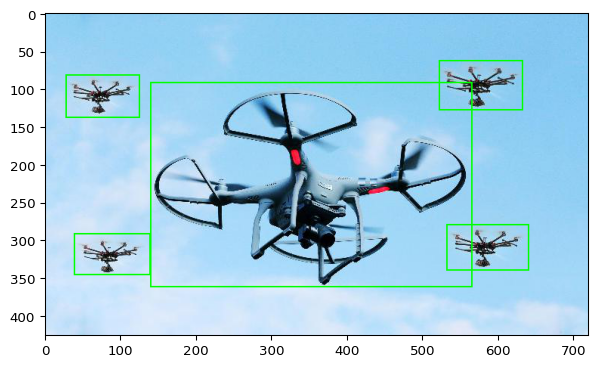

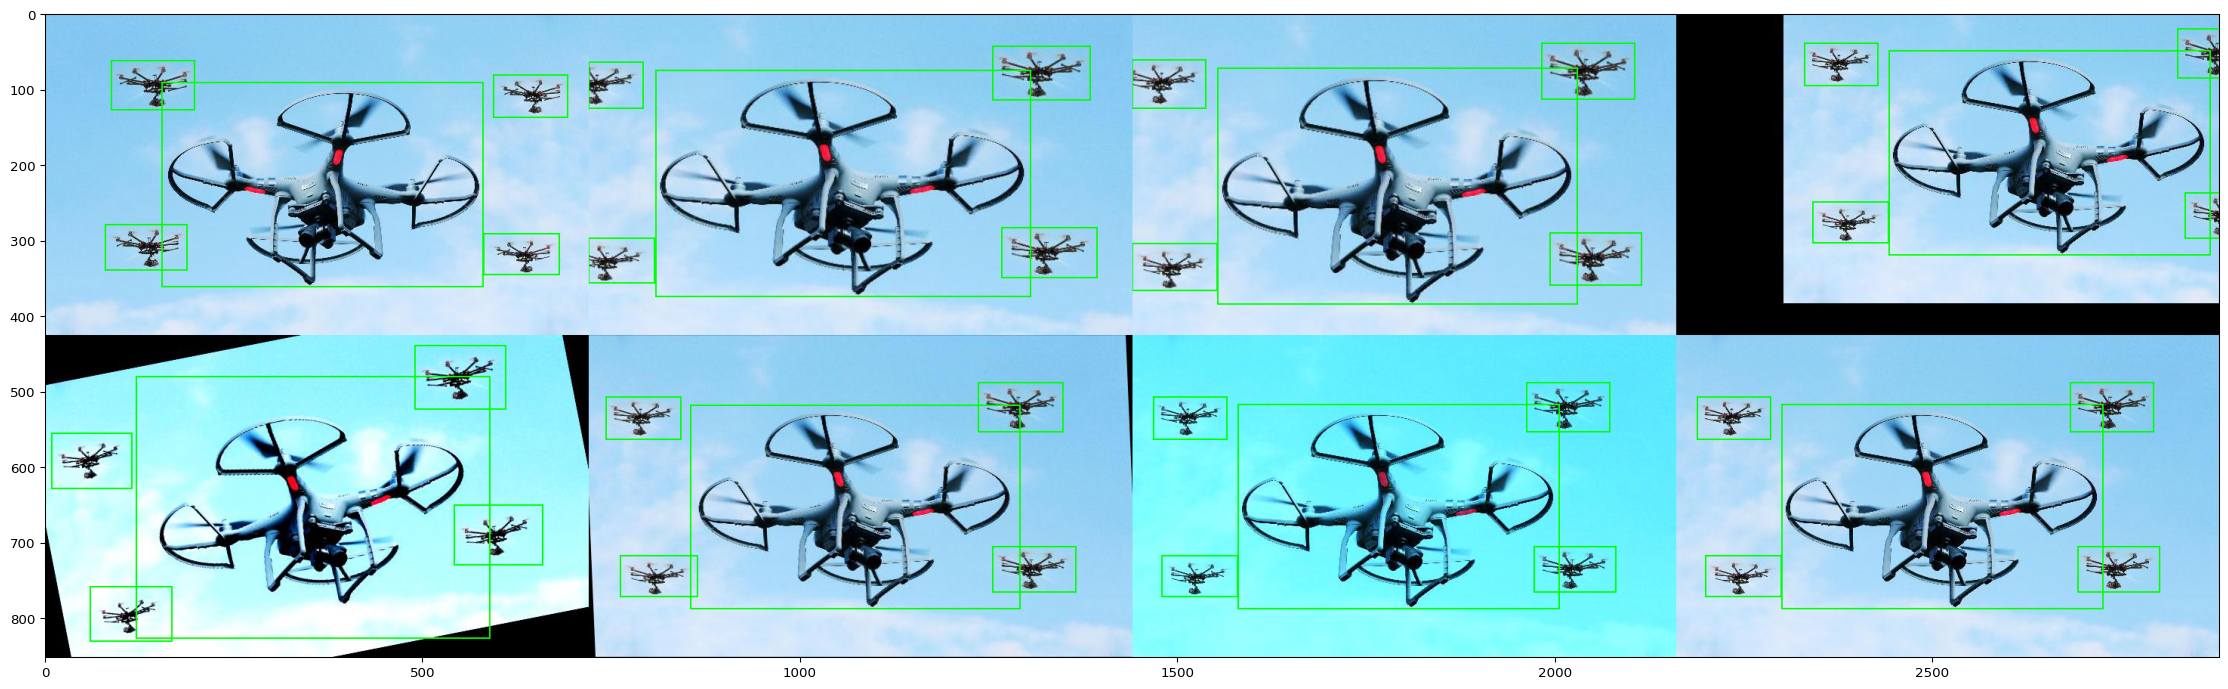

In [128]:
#Visulaization of the number of augmentations for a given image..
grouped_resized = resized_images_df.groupby('filename')
grouped_augmented = augmented_images_df.groupby('filename')

filename = resized_images_df['filename'].unique()[27]

group_r_df = grouped_resized.get_group(filename)
group_r_df = group_r_df.reset_index()
group_r_df = group_r_df.drop(['index'], axis=1)
bb_r_array = group_r_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
resized_img = imageio.imread(path+filename)
bbs_r = BoundingBoxesOnImage.from_xyxy_array(bb_r_array, shape=resized_img.shape)

ia.imshow(bbs_r.draw_on_image(resized_img, size=2))


lt = []
for i in range(8):
  group_a_df = grouped_augmented.get_group(image_prefixes[i]+filename)
  group_a_df = group_a_df.reset_index()
  group_a_df = group_a_df.drop(['index'], axis=1)
  bb_a_array = group_a_df.drop(['filename', 'width', 'height', 'class'], axis=1).values
  augmented_img = imageio.imread(path_to_aug_folder+image_prefixes[i]+filename)
  bbs_a = BoundingBoxesOnImage.from_xyxy_array(bb_a_array, shape=augmented_img.shape)
  lt.append([bbs_a,augmented_img])

ia.imshow(np.vstack([np.hstack([
            lt[0][0].draw_on_image(lt[0][1], size=2),
            lt[1][0].draw_on_image(lt[1][1], size=2),
            lt[2][0].draw_on_image(lt[2][1], size=2),
            lt[3][0].draw_on_image(lt[3][1], size=2)
            ]),
            np.hstack([lt[4][0].draw_on_image(lt[4][1], size=2),
            lt[5][0].draw_on_image(lt[5][1], size=2),
            lt[6][0].draw_on_image(lt[6][1], size=2),
            lt[7][0].draw_on_image(lt[7][1], size=2)
            ])
]))